<!--Dikasih HTML dikit gpp kan pak :P-->
<h1 align="center" style="margin-left:-60px;font-family:Tahoma;">UAS KECERDASAN BUATAN</h1>
<h2 align="center" style="margin-left:-60px;margin-top:5px;font-family:Tahoma;">Prediksi Kehilangan Pelanggan Menggunakan ANN</h2>

<pre style="font-size:15px;font-family:Tahoma;">
<b>Nama	: Krisna Rizki Pratama
Nim		: 2102020105
Kelas	: A3 Informatika</b>
</pre>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%load_ext tensorboard

2023-07-09 21:05:05.012491: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 21:05:05.193997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 21:05:05.195145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 21:05:06.008170: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("Dataset/data.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<h1>VISUALIZATION</h1>

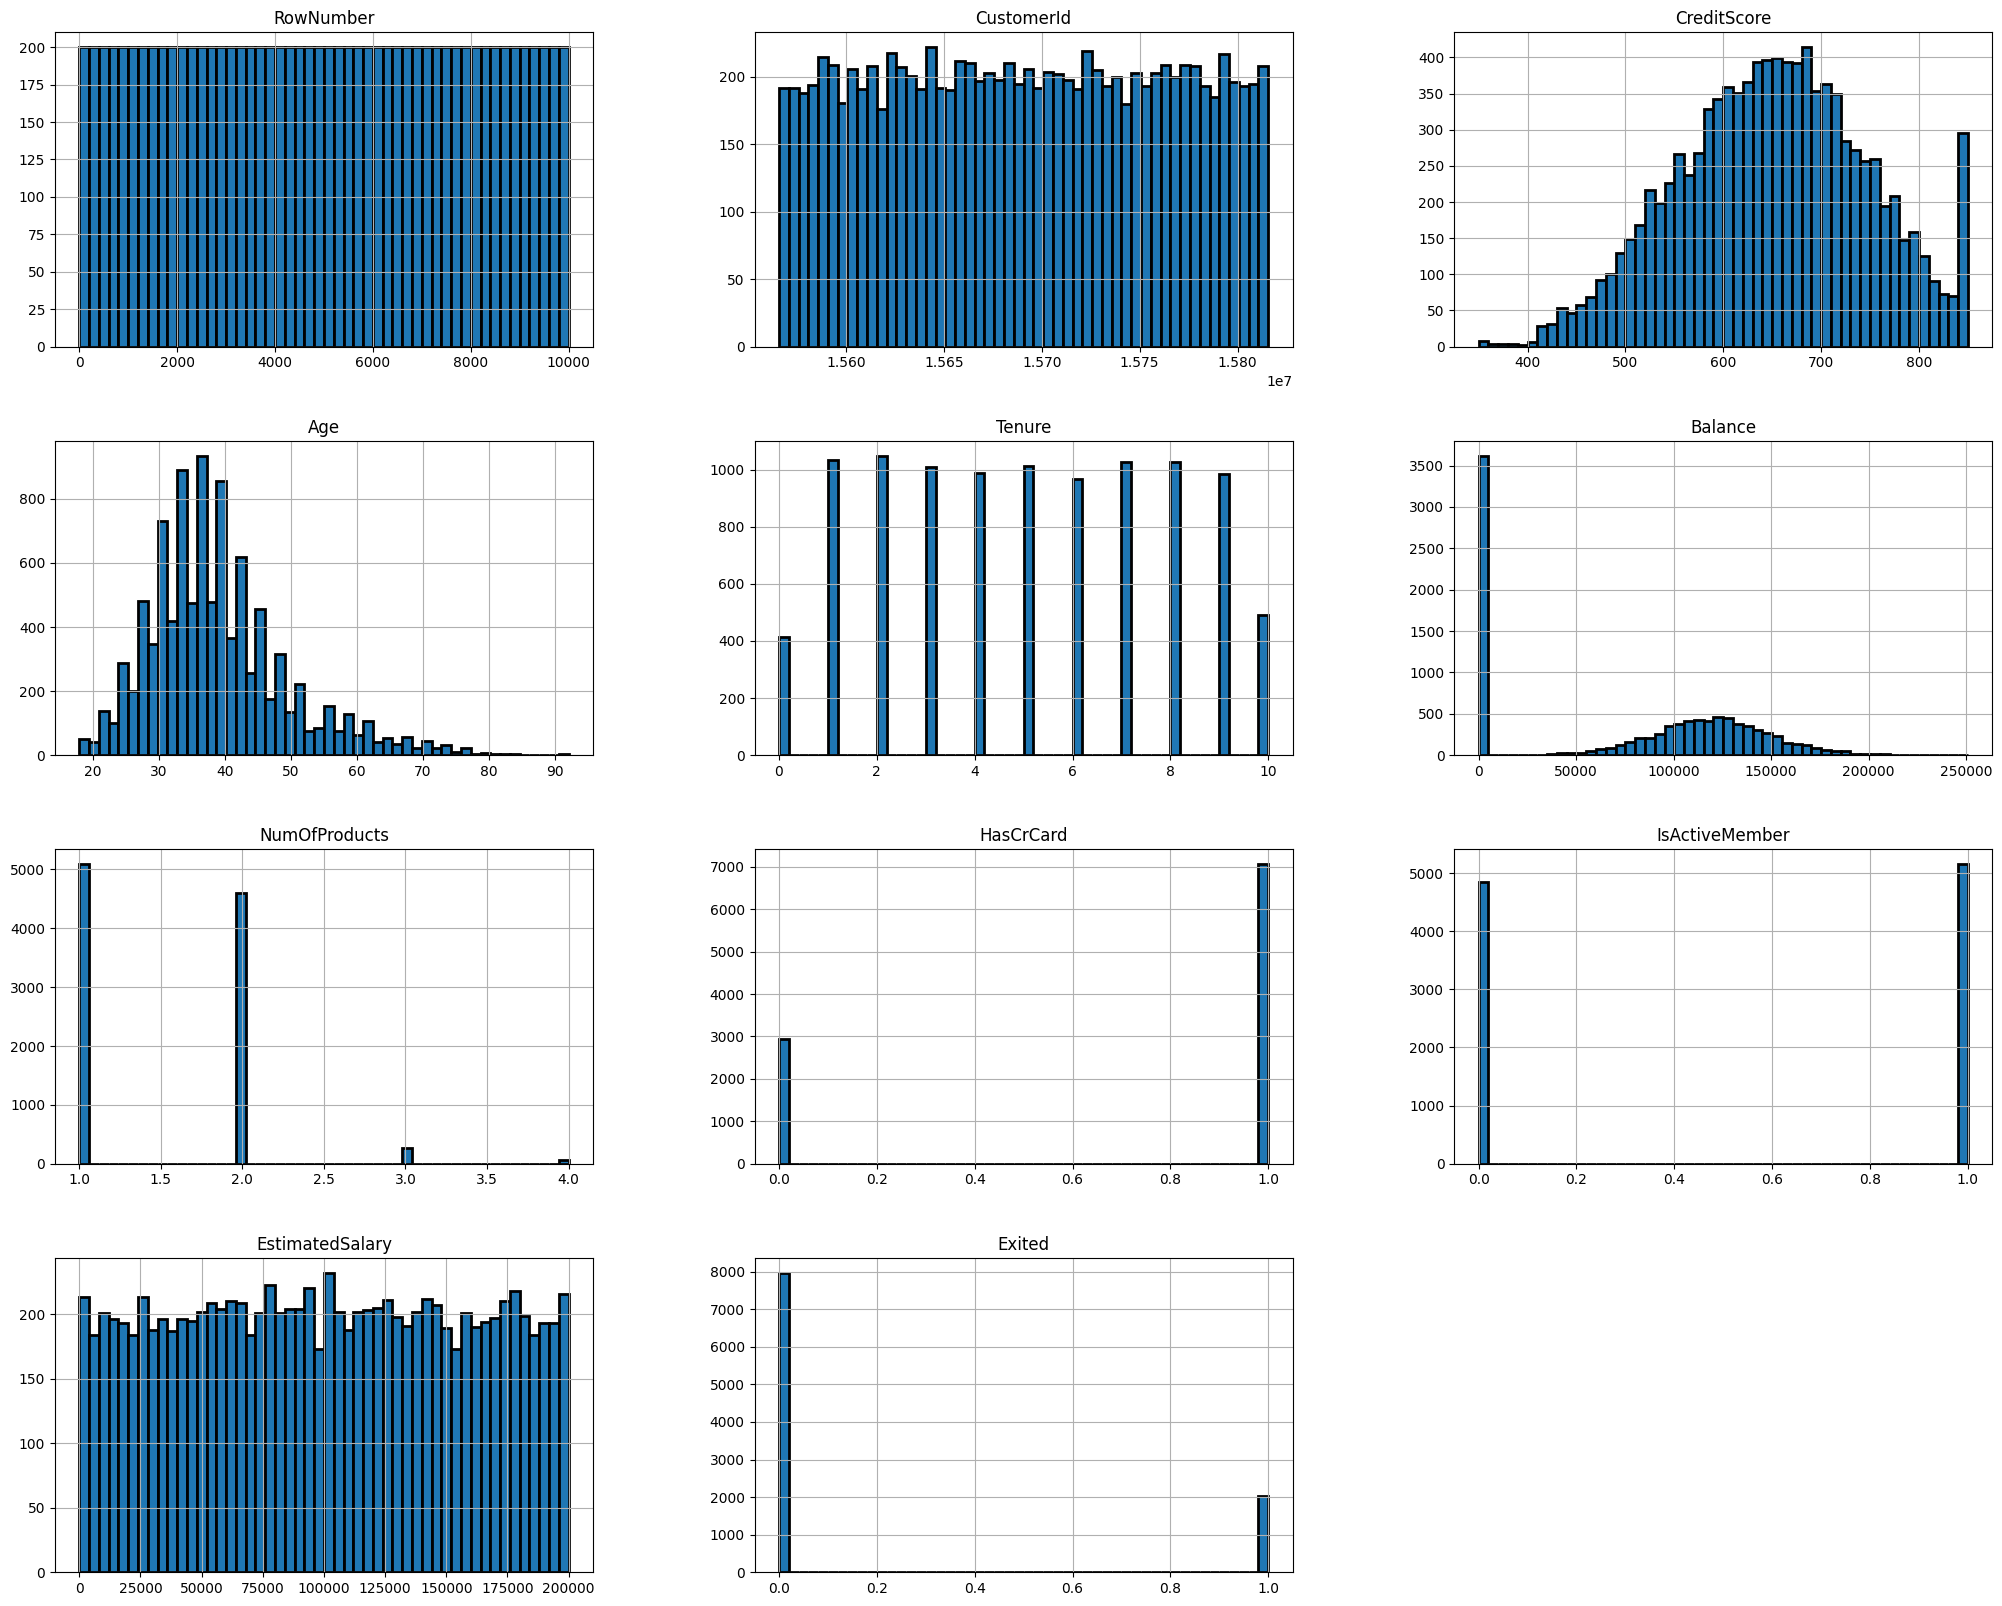

In [4]:
df.hist(bins=50, figsize=(25,20), edgecolor='black', linewidth=2)
plt.show()

In [5]:
df.drop(['Surname'],axis="columns",inplace=True)

In [6]:
df.drop(['CustomerId'],axis="columns",inplace=True)
df.drop(['RowNumber'],axis="columns",inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df.Gender.unique()

array([0, 1])

In [9]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
dummies = pd.get_dummies(df.Geography)
dummies

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [11]:
merged = pd.concat([df,dummies], axis="columns")
merged.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
merged.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [13]:
merged.drop(['Geography'],axis="columns",inplace=True)
merged.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
cols_to_scale = ['CreditScore','Age','EstimatedSalary','Tenure','Balance','NumOfProducts']

scaler = MinMaxScaler()
merged[cols_to_scale] = scaler.fit_transform(merged[cols_to_scale])

In [15]:
input =merged.drop(['Exited'],axis="columns")
target=merged.Exited

In [16]:
X_train,X_test,Y_train,Y_test =train_test_split(input,target, test_size=0.2,random_state=1)

In [17]:
print("Train data shape: ", X_train.shape)
print("Train labels shape: ", Y_train.shape)

print("Test data shape: ", X_test.shape)
print("Test labels shape: ", Y_test.shape)

Train data shape:  (8000, 12)
Train labels shape:  (8000,)
Test data shape:  (2000, 12)
Test labels shape:  (2000,)


<h1>ARTIFICIAL NEURAL NETWORK</h1>

In [18]:
model = keras.Sequential([
    keras.layers.Dense(6,input_shape=(12,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs",histogram_freq=1)
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=1000,callbacks=[tb_callback])

Epoch 1/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7964
Epoch 2/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7972
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7972
Epoch 4/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7972
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7972
Epoch 6/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.7972
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.7972
Epoch 8/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7980
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8019
Epoch 10/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.436

250/250 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8611
Epoch 81/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8610
Epoch 82/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8608
Epoch 83/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8605
Epoch 84/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8595
Epoch 85/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8605
Epoch 86/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8608
Epoch 87/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8612
Epoch 88/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8599
Epoch 89/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3415 - a

250/250 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8624
Epoch 160/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8619
Epoch 161/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8608
Epoch 162/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8633
Epoch 163/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8618
Epoch 164/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8611
Epoch 165/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8619
Epoch 166/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8609
Epoch 167/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8605
Epoch 168/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8629
Epoch 238/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8619
Epoch 239/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8635
Epoch 240/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8616
Epoch 241/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8620
Epoch 242/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8620
Epoch 243/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8619
Epoch 244/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8619
Epoch 245/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8618
Epoch 246/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8622
Epoch 316/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8625
Epoch 317/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8619
Epoch 318/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 0.8622
Epoch 319/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8624
Epoch 320/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8626
Epoch 321/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8624
Epoch 322/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8621
Epoch 323/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8622
Epoch 324/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8612
Epoch 394/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8620
Epoch 395/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8630
Epoch 396/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8622
Epoch 397/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8615
Epoch 398/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8609
Epoch 399/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8626
Epoch 400/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.8618
Epoch 401/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8621
Epoch 402/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8619
Epoch 472/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8622
Epoch 473/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.8618
Epoch 474/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8618
Epoch 475/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8621
Epoch 476/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8624
Epoch 477/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8614
Epoch 478/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8621
Epoch 479/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8622
Epoch 480/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8629
Epoch 550/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8620
Epoch 551/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8611
Epoch 552/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8630
Epoch 553/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8635
Epoch 554/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8630
Epoch 555/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8622
Epoch 556/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8619
Epoch 557/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8627
Epoch 558/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8626
Epoch 628/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8639
Epoch 629/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8629
Epoch 630/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8620
Epoch 631/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8629
Epoch 632/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8625
Epoch 633/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8625
Epoch 634/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8624
Epoch 635/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8624
Epoch 636/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8622
Epoch 706/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8640
Epoch 707/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8612
Epoch 708/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8630
Epoch 709/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8627
Epoch 710/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8626
Epoch 711/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8618
Epoch 712/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8620
Epoch 713/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8637
Epoch 714/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8616
Epoch 784/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8614
Epoch 785/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8619
Epoch 786/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8621
Epoch 787/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8622
Epoch 788/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8626
Epoch 789/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8599
Epoch 790/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8639
Epoch 791/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8605
Epoch 792/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8612
Epoch 862/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8618
Epoch 863/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8639
Epoch 864/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8622
Epoch 865/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8608
Epoch 866/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8609
Epoch 867/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8620
Epoch 868/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8622
Epoch 869/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8610
Epoch 870/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8619
Epoch 940/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8618
Epoch 941/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8618
Epoch 942/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8618
Epoch 943/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8624
Epoch 944/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8621
Epoch 945/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8618
Epoch 946/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8601
Epoch 947/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8610
Epoch 948/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

In [19]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 905us/step - loss: 0.3345 - accuracy: 0.8600


[0.3344670534133911, 0.8600000143051147]

<h1>TENSORBOARD</h1>

In [20]:
%tensorboard --logdir logs

In [21]:
Y_predicted= model.predict(X_test)
Y_predicted[:10]

63/63 [==============================] - 0s 743us/step


array([[0.03094676],
       [0.08968627],
       [0.06255928],
       [0.03576735],
       [0.06522886],
       [0.00782609],
       [0.18176137],
       [0.05730961],
       [0.1797356 ],
       [0.02186331]], dtype=float32)

In [22]:
Y_predicted_labels=[]
for element in Y_predicted:
    if element>0.5:
        Y_predicted_labels.append(1)
    else:
        Y_predicted_labels.append(0)


In [23]:
Y_predicted[20:30]

array([[0.1388872 ],
       [0.01636337],
       [0.3082497 ],
       [0.15225522],
       [0.08419178],
       [0.01704668],
       [0.37121487],
       [0.18599188],
       [0.15584564],
       [0.05555246]], dtype=float32)

In [24]:
Y_predicted_labels[20:30]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
Y_test[20:30]

7673    0
2907    0
1266    0
2370    0
3092    0
130     0
1988    1
7877    1
6450    0
6880    0
Name: Exited, dtype: int64

<h1>CONFUSION MATRIX</h1>

In [26]:
cm = confusion_matrix(Y_test,Y_predicted_labels)
cm

array([[1535,   50],
       [ 230,  185]])

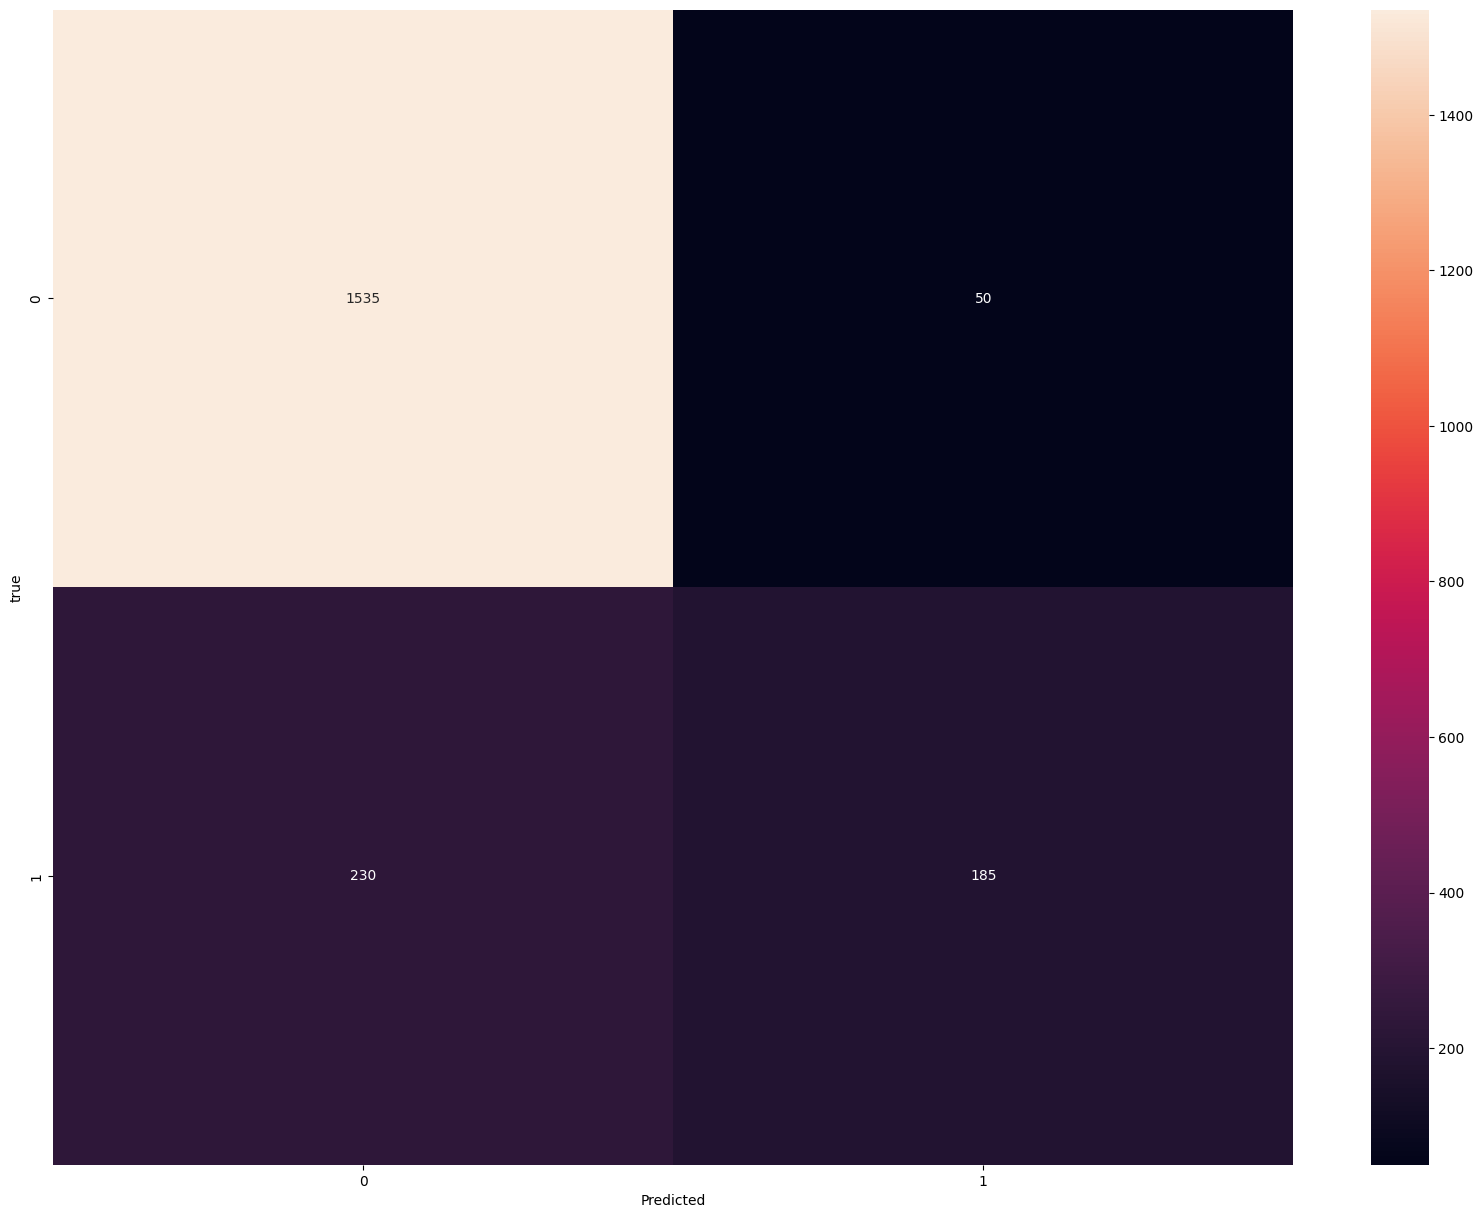

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

<h1>CLASSIFICATION REPORT</h1>

In [28]:
print(classification_report(Y_test,Y_predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.79      0.45      0.57       415

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [29]:
tn = cm[0, 0]  
tp = cm[1, 1]  
fn = cm[1, 0]
fp = cm[0, 1]  

rec = tp/(tp+fn)
spe = tn/(tn+fp)
fal = fp/(fp+tn)
als = fn/(fn+tp)
pre = tp/(tp+fp)
f1_Score = 2 * (pre * rec) / (pre + rec)
_, accuracy = model.evaluate(X_test, Y_test)

print(f"Recall/Sensitivity\t: {rec:.2f}")
print(f"Precession\t\t: {pre:.2f}")
print(f"Specificity\t\t: {spe:.2f}")
print(f"FPR\t\t\t: {fal:.2f}")
print(f"FNR\t\t\t: {als:.2f}")
print(f"F1 Score\t\t: {f1_Score:.2f}")
print(f"Accuracy\t\t: {accuracy:.2f}")

63/63 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8600
Recall/Sensitivity	: 0.45
Precession		: 0.79
Specificity		: 0.97
FPR			: 0.03
FNR			: 0.55
F1 Score		: 0.57
Accuracy		: 0.86
